<a href="https://colab.research.google.com/github/sanketnaik99/us-accidents-analysis/blob/main/US_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

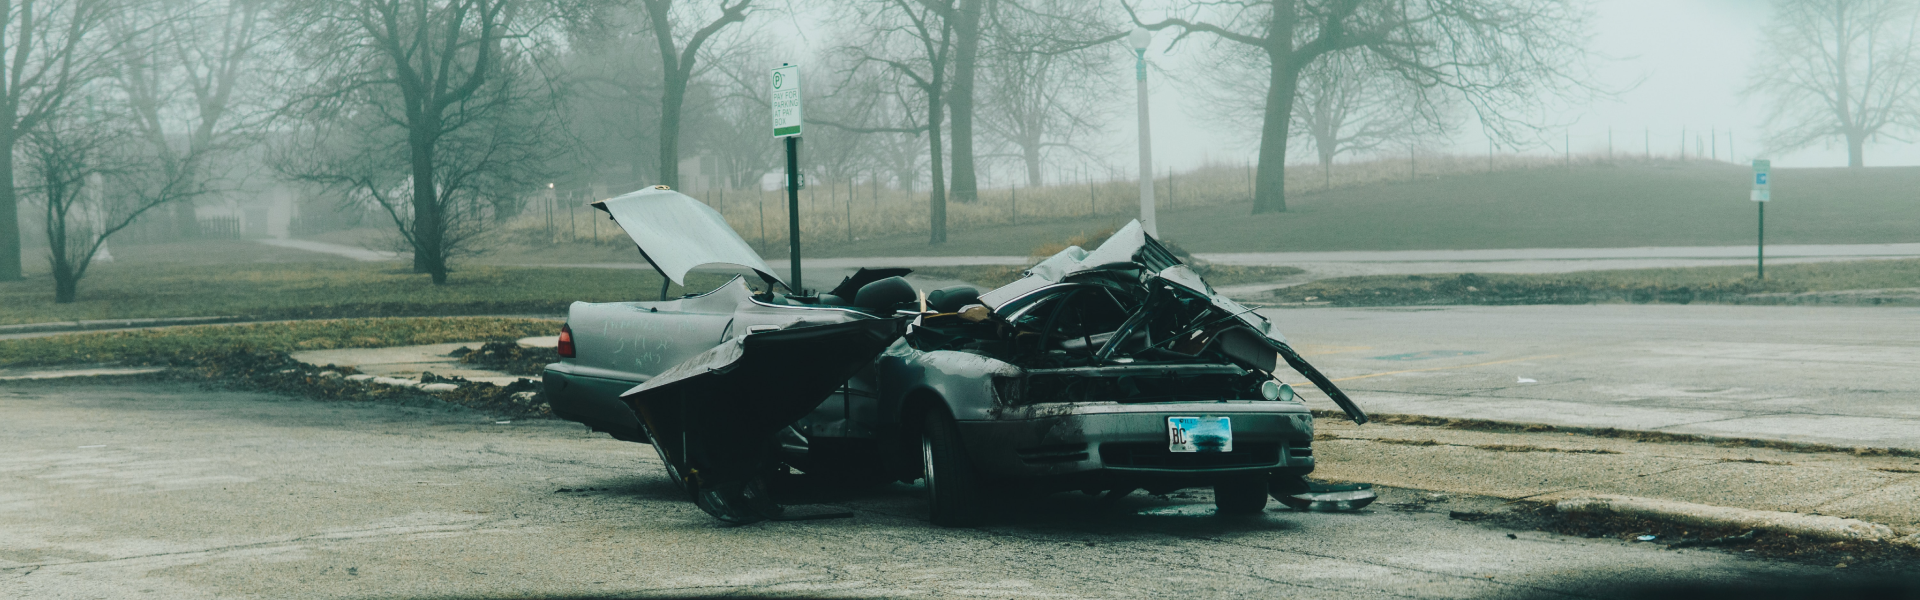

# **US Accidents Data Analysis**

This project analyzes the [US Accidents dataset](https://www.kaggle.com/sobhanmoosavi/us-accidents) from Kaggle. The project asks and answers a few important questions related to the location, temperature and time of an accident and tries to find a relation between them and the number of accidents.

# Installing the Kaggle CLI
The Kaggle CLI will let us donwload the dataset easily and we won't have to upload the dataset to colab every time we run the notebook.

In [2]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
from tabulate import tabulate
import folium

# Downloading the Data
We can now download the data using the Kaggle CLI.
Kaggle CLI downloads the dataset in a zip format. We can then use the unzip package to unzip the contents of the zip file.

In [5]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 99% 287M/290M [00:02<00:00, 112MB/s]
100% 290M/290M [00:02<00:00, 102MB/s]


In [6]:
import os
os.listdir()

['.config', 'kaggle.json', 'us-accidents.zip', 'sample_data']

In [7]:
!mkdir data

In [8]:
!unzip us-accidents.zip -d data

Archive:  us-accidents.zip
  inflating: data/US_Accidents_Dec20_Updated.csv  


We can see that the `us-accidents.zip` file consists of a single CSV file called `US_Accidents_Dec20.csv`

In [9]:
data_filename = './data/US_Accidents_Dec20_Updated.csv'

#  Data Preparation & Cleaning
We will follow these steps in the process of data preparation and cleaning -
- Load the file using Pandas.
- Look at some infromation about the data and columns.
- Fix any missing or incorrect values.

## Loading the dataset and initial observations

In [10]:
df = pd.read_csv(data_filename)

In [11]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
print(f'Number of columns = {len(df.columns)}')
print(df.info())

Number of columns = 47
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64


We can see that the dataset has 49 columns. The distribution of these columns is as follows - 
1. Boolean Columns - 13
2. Object Columns - 21
3. Numerical Columns - 15

The `describe` method displays descriptive statistics about the numerical columns present in the dataset.

In [13]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Missing values
To find which columns have missing values and how many values are missing, we can use the `isna` function and then apply the `sum` function to get the total count of missing values for each column. we can then sort these values using the `sort_values` function. Finally, if we divide them by the length of the DataFrame, we will get the fraction of missing values for each column.

In [14]:
missing_fractions = df.isna().sum().sort_values(ascending=False) / len(df)
missing_fractions

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

We can remove the columns that have zero missing values so that we can plot the values in a better way.

In [15]:
missing_fractions[missing_fractions != 0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

We can plot these columns using the `plot` function so that we can visualize the data more efficiently.

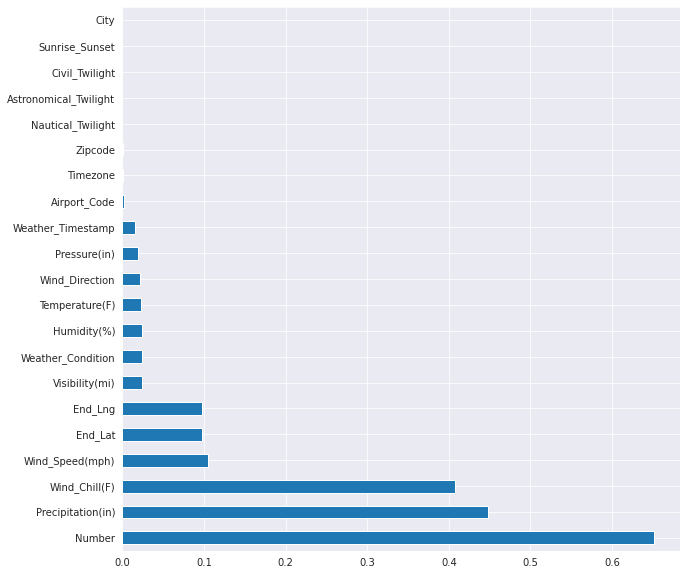

In [16]:
plt.figure(figsize=(10,10))
missing_fractions[missing_fractions != 0].plot(kind='barh')

We can see that some of these columns have many missing values. For example, `End_Lng` and `End_Lat` have more than **67%** missing data. These columns won't be useful for extracting any meaningful information from the dataset. Similarly, we can remove any other columns that have more than **10%** missing data.



## Boolean Values
We can have a look at the boolean values to see if the `True` and `False` values have any relevant information.
We can do this by checking the count of `True` and `False` values in the specific columns.

First, we can select the boolean columns and make a separate DataFrame out of them.

In [17]:
booleans = df.select_dtypes(include='bool')
booleans.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,False,True,False


We can now check to see the distribution of `True` and `False` values for each column.

In [18]:
data = []
total_count = len(booleans)
for column in booleans.columns:
  data.append([column, (len(booleans[column][booleans[column] == True]) / total_count) * 100, (len(booleans[column][booleans[column] == False]) / total_count) * 100, total_count])
print(tabulate(data, headers=['Columns', 'True %', 'False %', 'Total Count'], tablefmt='orgtbl'))

| Columns         |      True % |   False % |   Total Count |
|-----------------+-------------+-----------+---------------|
| Amenity         |  1.07926    |   98.9207 |       2906610 |
| Bump            |  0.0199201  |   99.9801 |       2906610 |
| Crossing        |  7.53211    |   92.4679 |       2906610 |
| Give_Way        |  0.282804   |   99.7172 |       2906610 |
| Junction        |  9.49825    |   90.5018 |       2906610 |
| No_Exit         |  0.132732   |   99.8673 |       2906610 |
| Railway         |  0.892001   |   99.108  |       2906610 |
| Roundabout      |  0.00488542 |   99.9951 |       2906610 |
| Station         |  1.99236    |   98.0076 |       2906610 |
| Stop            |  1.56381    |   98.4362 |       2906610 |
| Traffic_Calming |  0.0449665  |   99.955  |       2906610 |
| Traffic_Signal  | 15.608      |   84.392  |       2906610 |
| Turning_Loop    |  0          |  100      |       2906610 |


We can see that the percentage of `False` values is very high for most columns. These columns can be dropped since these can be a sign of missing data or irrelevant data. Hence, we will drop all columns where the **% of False values is >= 99%**

## City Data

We have observed above that some of the data related to city names is missing. However, we have all the data for the `Start_lat` and `Start_lng` which indicate the latitude and longitude where the accident occurred. We can use this to check where the accident occurred.



In [19]:
print(f'Number of missing values in the City column = {df.City.isna().sum()}')

Number of missing values in the City column = 108


In [21]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [21]:
def get_city(index):
  data_point = df.iloc[index]
  start_lat= data_point["Start_Lat"]
  start_lng = data_point["Start_Lng"]
  geolocator = Nominatim(user_agent="geoapiExercises")
  try:
    location = geolocator.reverse(f"{start_lat},{start_lng}", timeout=None) 
    address = location.raw['address']
  except GeocoderTimedOut as e:
    print(f"Geocoder Timed out at index {index}")
    return np.NaN, False
  try:
    city = address['city']
    # print(f"FOUND City for index {index} = {city}")
    return city, True
  except:
    # print(f"NOT FOUND City for index = {index}")
    return np.NaN, False

In [22]:
indexes = df[df['City'].isnull()].index.tolist()
total_found = 0
for index in indexes:
  value, result = get_city(index)
  if result == True:
    total_found += 1
  df.at[index, 'City'] = value

In [23]:
print(f"Total missing values found = {total_found}")
print(f'Number of missing values in the City column = {df.City.isna().sum()}')

Total missing values found = 45
Number of missing values in the City column = 63


Not all City names were found but this function was able to find at least **55** city names. We can drop the remaining **82** values since they do not form a major chunk of the data.

## Zipcode Data
The Zipcode data also has a few missing values. We can use a technique similar to the one used for the City data and get the Zipcode for the missing values using the `Start_lat` and `Start_lng`. 

In [24]:
print(f'Number of missing values in the Zipcode column = {df.Zipcode.isna().sum()}')

Number of missing values in the Zipcode column = 1114


We can use the function used for the City Data with some modifications to get the Zipcode for the specified co-ordinates.

In [25]:
def get_zipcode(index):
  data_point = df.iloc[index]
  start_lat= data_point["Start_Lat"]
  start_lng = data_point["Start_Lng"]
  geolocator = Nominatim(user_agent="geoapiExercises")
  try:
    location = geolocator.reverse(f"{start_lat},{start_lng}", timeout=None) 
    address = location.raw['address']
  except GeocoderTimedOut as e:
    print(f"Geocoder Timed out at index {index}")
    return np.NaN, False
  try:
    zipcode = address['postcode']
    # print(f"FOUND ZipCode for index {index} = {zipcode}")
    return zipcode, True
  except:
    # print(f"NOT FOUND ZipCode for index = {index}")
    return np.NaN, False

In [ ]:
indexes = df[df['Zipcode'].isnull()].index.tolist()
total_found = 0
for index in indexes:
  value, result = get_zipcode(index)
  if result == True:
    total_found += 1
  df.at[index, 'Zipcode'] = value

In [ ]:
print(f"Total missing values found = {total_found}")
print(f'Number of missing values in the Zipcode column = {df.Zipcode.isna().sum()}')

This technique still doesn't work for all cases and some missing values are still present. These can dropped since they don't form a huge chunk of the dataset.

## Cleaning the Dataset
As we have concluded from the above steps, we can remove some of the columns that have missing or irrelevant values. The columns that will be removed are as follows.

In [ ]:
dropped_cols = ['End_Lat', 'End_Lng', 'Number', 'Precipitation(in)', 'Wind_Chill(F)', 'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Traffic_Calming', 'Turning_Loop']

In [ ]:
df.drop(dropped_cols, inplace=True, axis=1)
df.info()

Next, we can drop the `NaN` (null) values from the dataset.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df.isnull()].value_counts()

Now that we have no null values, we can save the DataFrame as a CSV so that we can load it later.

In [ ]:
df.to_csv('./data/US_Accidents_Dec20_Cleaned.csv')

# Loading the Cleaned Dataset
The cleaned dataset was uploaded to Kaggle so that we can use the Kaggle CLI to download the data easily.

In [5]:
!kaggle datasets download -d sanketnaik99/us-accidents-december-2020-cleaned

 98% 252M/258M [00:04<00:00, 92.5MB/s]
100% 258M/258M [00:04<00:00, 65.4MB/s]


In [6]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [7]:
!unzip us-accidents-december-2020-cleaned.zip -d data

Archive:  us-accidents-december-2020-cleaned.zip
  inflating: data/US_Accidents_Dec20_Cleaned.csv  


In [8]:
data_filename = './data/US_Accidents_Dec20_Cleaned.csv'

In [9]:
df = pd.read_csv(data_filename)

# Exploratory Analysis & Visualization
In this step we will analyze some important columns which will help us get a better understanding of the dataset. Some of the important columns that we will be looking at are -
1. City
2. Start Time
3. State
4. Temperature

## City
The city coulmn states the name of the city where the accident occurred. This can be helpful to answer some important questions such as -
1. Which are the top 5 cities by number of accidents.
2. What is the distribution of accidents by cities?
3. How many accidents occurred in cities with very high number of accidents (>=10,000)

First, we can check the number of unique values for the cities field.

In [78]:
cities = df.City.unique()
len(cities)

11824

As shown above, the dataset contains accident data from 12,251 cities out of 19,502 total cities as of 2019.


### Top cities by the number of accidents

We can have a look at the top cities by number of accidents by using the `value_counts` function which returns the count of each unique value in a Column.

In [79]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

Houston          101525
Charlotte         78838
Dallas            73274
Los Angeles       69622
Austin            59853
Miami             58582
Raleigh           47943
Atlanta           40637
Baton Rouge       39905
Nashville         39059
Oklahoma City     38296
Orlando           36829
Sacramento        34862
Minneapolis       30782
Phoenix           28063
San Diego         26775
San Antonio       25588
Seattle           24592
Richmond          23969
Jacksonville      22306
Name: City, dtype: int64

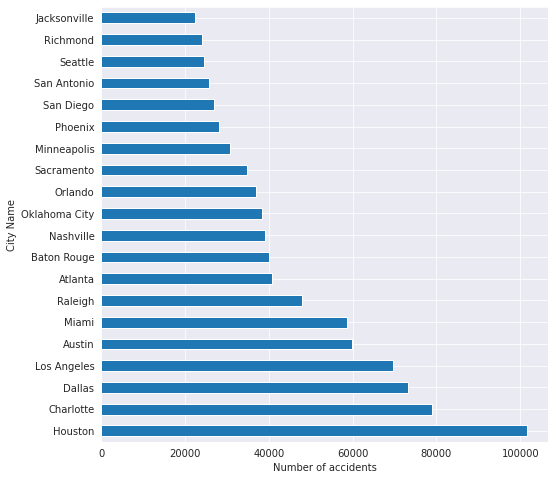

In [80]:
plt.figure(figsize=(8,8))
ax = cities_by_accidents[:20].plot(kind='barh')
ax.set(xlabel='Number of accidents', ylabel='City Name')
plt.show()

We can see that Houston, Charlotte, Dallas, Los Angeles and Austin have the highest number of accidents. Interestingly, 3 out of the top 5 cities are located in the state of Texas.

### States of top 50 cities by number of accidents

In [81]:
total = 0
for city in cities_by_accidents[:50]:
  total += city
print(total)
print(total/len(df))

1373632
0.36986390262487934


The total number of accidents from the top 50 cities by number of accidents is equal to **1,373,632** which is almost **37%** of the entire dataset.

In [82]:
cities_list = df.City.value_counts().index.tolist()
states_dict = {}
for city in cities_list[:50]:
  state = df[df.City == city].iloc[0].State
  if state in states_dict.keys():
    states_dict[state] += 1
  else:
    states_dict[state] = 1

states_dict = {k: v for k, v in sorted(states_dict.items(), key=lambda item: item[1], reverse=True)}

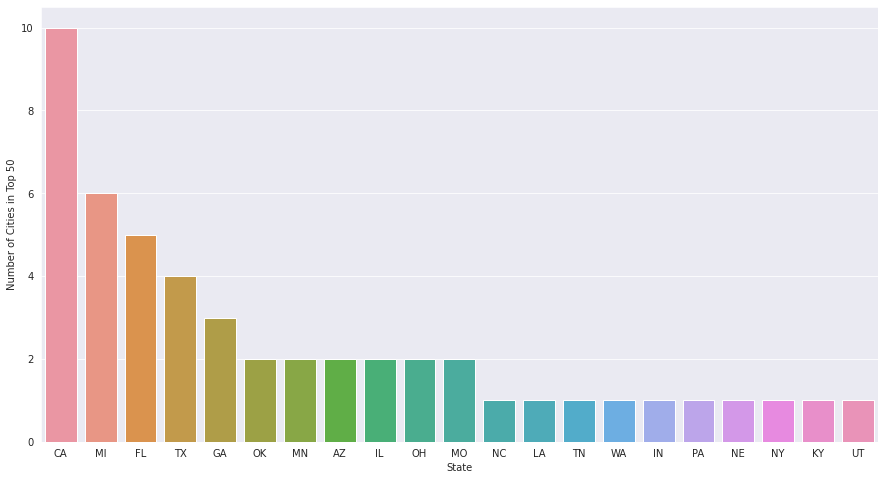

In [83]:
keys = list(states_dict.keys())
vals = [int(states_dict[k]) for k in keys]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=keys, y=vals)
ax.set(xlabel='State', ylabel='Number of Cities in Top 50')
plt.show()

We can see that 10 out of 50 cities that contribute the highest number of accidents belong to California. The other states in the top 3 are Michigan and Florida.

### Distribution of accidents by cities
We can analyze the number of accidents per city to check the distribution of number of accidents per city.

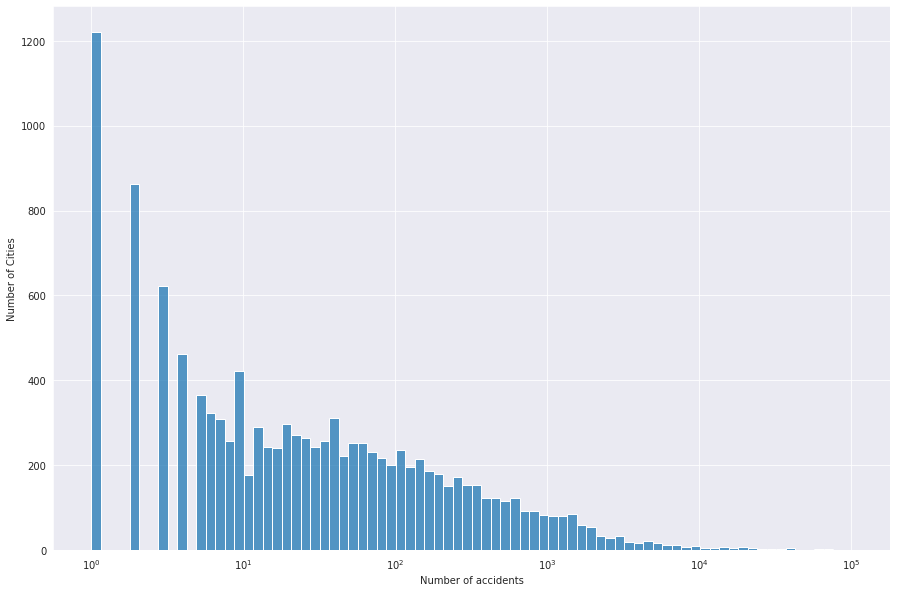

In [84]:
plt.figure(figsize=(15,10))
ax = sns.histplot(cities_by_accidents, log_scale=True, bins=80)
ax.set(xlabel='Number of accidents', ylabel='Number of Cities')
plt.show()

We can see that many cities have a very low number of accidents reported. We can analyze this further by checking what percentage of cities have reported more than 1,000 accidents in the timeframe.

In [85]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [86]:
(len(high_accident_cities) / len(cities)) * 100

5.2435723951285516

We can see that less than 5% of the cities have reported more than 1,000 accidents.

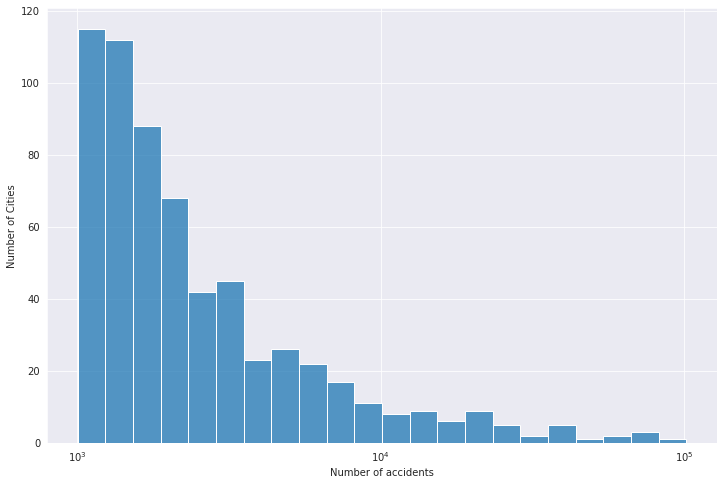

In [87]:
plt.figure(figsize=(12,8))
ax = sns.histplot(high_accident_cities, log_scale=True)
ax.set(xlabel='Number of accidents', ylabel='Number of Cities')
plt.show()

Even in the cities that reported more than 1,000 accidents, most have reported between 1,000 and 10,000 accidents. We can further create a sub-type called very high accident cities with more than 10,000 accidents.

In [88]:
very_high_accident_cities = cities_by_accidents[cities_by_accidents >= 10000]

In [89]:
print(f"Number of very high accident cities = {len(very_high_accident_cities)}")
print(f"Percentage of dataset = {(len(very_high_accident_cities) / len(cities)) * 100}")

Number of very high accident cities = 52
Percentage of dataset = 0.4397834912043302


We can see that these 52 cities represent only **0.43%** of the entire dataset.

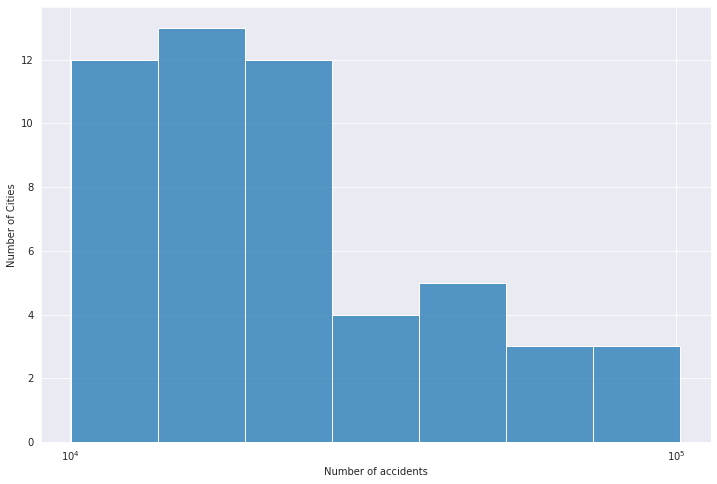

In [90]:
plt.figure(figsize=(12,8))
ax = sns.histplot(very_high_accident_cities, log_scale=True)
ax.set(xlabel='Number of accidents', ylabel='Number of Cities')
plt.show()

### Number of accidents from very high accident cities
We know that 52 cities have reported >= 10,000 accidents. We can now check the total number of accidents reported by these cities.


In [91]:
city_names = very_high_accident_cities.keys()
city_names = np.array(city_names)

In [92]:
very_h_cities = df[df.City.isin(city_names)]

In [93]:
print(f"Number of accidents in reported by citites in Very High (>=10,000) accidents range = {len(very_h_cities)}")
print(f"Total Number of Cities in dataset = {len(df)}")
print(f"Percentage of accidents reported by cities in Very High (>=10,000) accidents range = {round((len(very_h_cities) / len(df)) * 100, 2)} %")

Number of accidents in reported by citites in Very High (>=10,000) accidents range = 1393963
Total Number of Cities in dataset = 3713885
Percentage of accidents reported by cities in Very High (>=10,000) accidents range = 37.53 %


We can see that the Cities in the Very High (>=10,000) accidents range contribute to **37.53%** of all accident data. Moreover, the number of cities that contribute this data is only **52** and represents **0.43%** of all cities present in the dataset.

### New York City
New York City is the most populous city in the US. We can check if NYC comes in the very high accident cities (accidents >= 10,000). This will help us form a relation between the number of accidents and the population.

In [94]:
len(df[df.City == 'New York'])

7512

It seems that New York **does not** have a high number of accidents considering its polulation. In fact, there are at least 52 cities which have reported higher number of accidents as compared to New York City.

## Start Time
The `Start_Time` column shows start time of the accident in local time zone. This can be used to answer questions such as - 
1. What are the typical times when a high number of accidents happen?
2. Are accidents more common during the peak hours when people are traveling to working?
3. Are accidents more frequent on weekdays or weekends?

First, we can have a look at the `Start_Time` column.

In [95]:
df.Start_Time.head()

0   2016-02-08 06:49:27
1   2016-02-08 07:23:34
2   2016-02-08 07:39:07
3   2016-02-08 07:44:26
4   2016-02-08 07:59:35
Name: Start_Time, dtype: datetime64[ns]

The data in this column contains a timestamp but it is in string from and cannot be easily used to get information about the hour or day of the accident.

We can convert the data into a datetime object by using the `to_datetime` function of pandas.

In [96]:
df.Start_Time = pd.to_datetime(df.Start_Time)

We can now access properties such as `hour`, `day of week` and other details easily.

In [97]:
df.Start_Time[0].hour

6

### Distribution of accidents by the Hour
We can check if there are more accidents in at a certain hour or whether the data is more evenly spread out.
This can help us answer qustions like is the number of accidents higher in the peak hours when more people are traveling to their workplace.

In [98]:
df['Hour_of_Day'] = df.Start_Time.dt.hour

In [99]:
def bins_labels(bins, labels, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), labels, **kwargs)
    plt.xlim(bins[0], bins[-1])

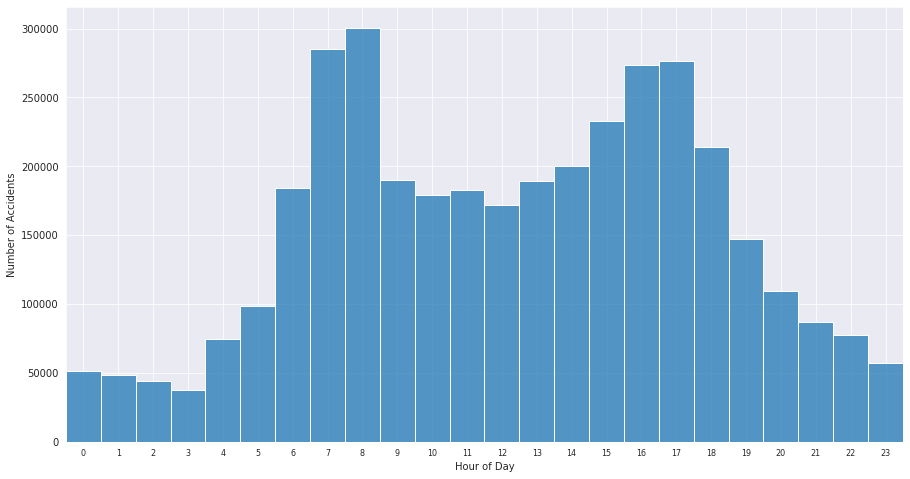

In [100]:
plt.figure(figsize=(15, 8))
bins = range(0, 25)
ax = sns.histplot(df.Hour_of_Day, bins=bins)
ax.set(xlabel='Hour of Day', ylabel='Number of Accidents')
labels = np.arange(24)
bins_labels(bins, labels, fontsize=8)
plt.show()

We can see that the number of accidents that happen between 6 AM and 9 AM in the morning and 3 PM and 6 PM in evening is very high.
These times are often the times when most poeple go to work and leave from work. Hence, we can see that most accidents happen when people are traveling to and from work.

### Distribution of accidents by Day
We can check if the number of accidents that happen on weekdays is greater than then number of accidents that happen on weekends. This will help us better understand the observation that we made above - that most accidents happen when people are traveling to and from work. Since many people don't work on weekends, the number of accidents on weekends should ideally be lower than the number of accidents on other days.

In [101]:
df['Day_of_Week'] = df.Start_Time.dt.dayofweek

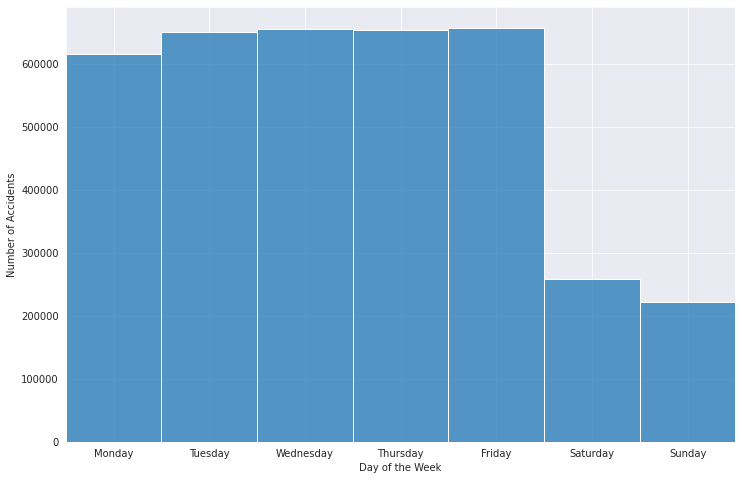

In [102]:
plt.figure(figsize=(12, 8))
bins = range(0, 8)
ax = sns.histplot(df.Day_of_Week, bins=bins)
ax.set(xlabel='Day of the Week', ylabel='Number of Accidents')
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bins_labels(bins, labels, fontsize=10)
plt.show()

We can see that the number of accidents are higher on weekdays and lower on weekends. This proves our initial observation.


### Accident distribution on weekends
We have seen that most  accidents occur on weekdays and these accidents mainly occur during the peak traveling hours. Most people don't work on weekends so we can check the distribution of accidents on weekends to evaluate our observation.



In [103]:
weekends_accidents = df.Start_Time[df.Start_Time.dt.dayofweek >= 5]

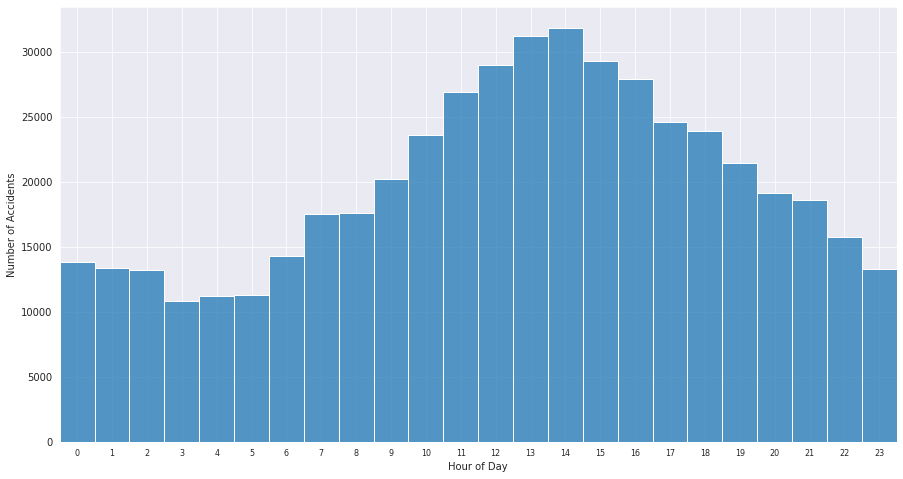

In [104]:
plt.figure(figsize=(15, 8))
bins = range(0, 25)
ax = sns.histplot(weekends_accidents.dt.hour, bins=bins)
ax.set(xlabel='Hour of Day', ylabel='Number of Accidents')
labels = np.arange(24)
bins_labels(bins, labels, fontsize=8)
plt.show()

We can see that the distribution of accidents is more spread out on weekends and we don't find the 2 distinct peaks in the data.

### Accident Distribution on Weekdays
Let's confirm our observation that most accidents occur during the peak hours by finding out the total number of accidents that happened between 6 AM and 9 AM and 3 PM and 6 PM on weekdays.

First, let's see the distribution of accidents on weekdays again.

In [105]:
weekday_accidents = df.Start_Time[df.Start_Time.dt.dayofweek < 5]

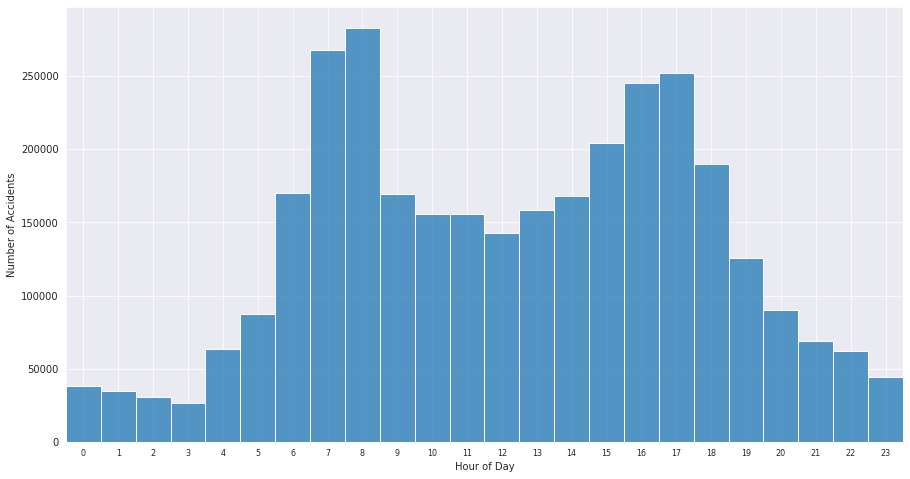

In [106]:
plt.figure(figsize=(15, 8))
bins = range(0, 25)
ax = sns.histplot(weekday_accidents.dt.hour, bins=bins)
ax.set(xlabel='Hour of Day', ylabel='Number of Accidents')
labels = np.arange(24)
bins_labels(bins, labels, fontsize=8)
plt.show()

Now, we can find the number of accidents that occurred between 6 AM and 9 AM and 3 PM and 6 PM.

In [107]:
morning = weekday_accidents[(weekday_accidents.dt.hour >= 6) & (weekday_accidents.dt.hour <= 9)]
evening = weekday_accidents[(weekday_accidents.dt.hour >= 15) & (weekday_accidents.dt.hour <= 18)]
weekday_peak_hour_accidents = pd.concat([morning, evening])

In [108]:
percentage = (len(weekday_peak_hour_accidents) / len(df)) * 100
print(f"Total Number of accidents in the dataset = {len(df)}")
print(f"Number of accidents that happen in peak hours = {len(weekday_peak_hour_accidents)}")
print(f"Percentage of total accidents that happen in peak hours = {round(percentage, 2)}%")

Total Number of accidents in the dataset = 3713885
Number of accidents that happen in peak hours = 1782351
Percentage of total accidents that happen in peak hours = 47.99%


Hence, we can see that **47.99%** happen during the peak hours of 6 AM to 9 AM and 3 PM to 6 PM and we can conclude that a large number of accidents occur during the peak hours.

### Accident Distribution by Month

In [132]:
df.Start_Time.dt.month_name().value_counts()

December     463884
November     428762
October      409064
September    329669
August       279773
June         277410
April        274542
May          269800
March        256989
January      255702
February     245337
July         222953
Name: Start_Time, dtype: int64

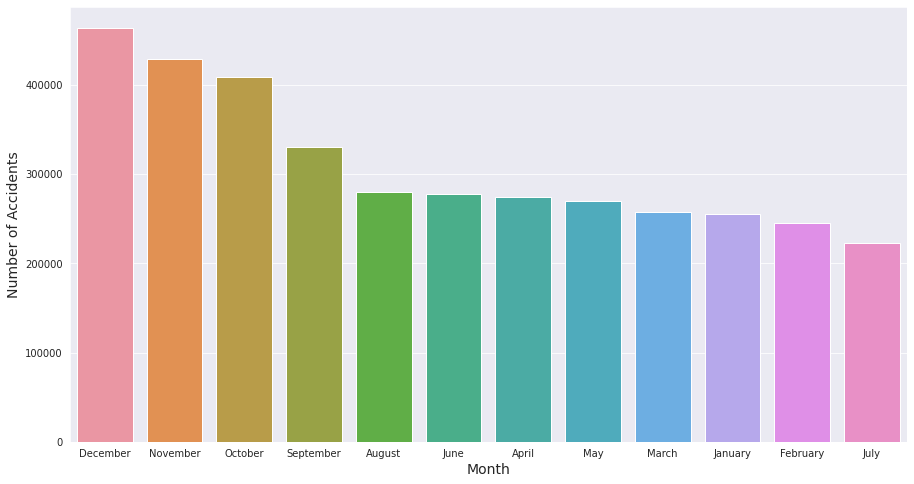

In [133]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=df.Start_Time.dt.month_name().value_counts().index, y=df.Start_Time.dt.month_name().value_counts())
ax.set(xlabel='Month', ylabel='Number of Accidents')
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(14)
plt.show()

We can see that the holiday season contributes the highest number of accidents. This is in line with the [National Highway Traffic Safety Administration Report](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812823) which states that there are generally more car crash fatalities during the holidays than non-holidays. For example, in 2017, the average amount of fatalities during major holidays was 119 per day compared to 102 per day at other times of the year. 

### Accident Distribution by Year

In [109]:
df.Start_Time.dt.year.value_counts()

2020    1207135
2019     886313
2018     716154
2017     575936
2016     328347
Name: Start_Time, dtype: int64

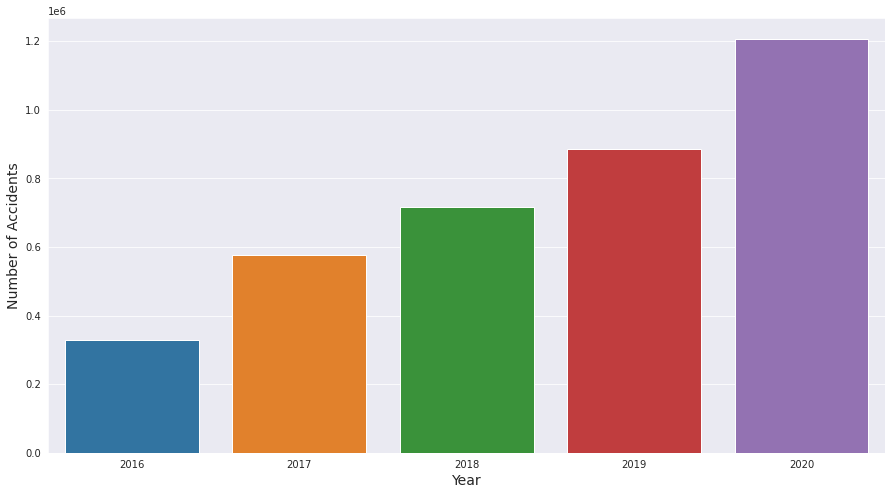

In [110]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x=df.Start_Time.dt.year)
ax.set(xlabel='Year', ylabel='Number of Accidents')
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(14)
plt.show()

## State
The State Column can be used to get more information about the number of accidents reported from each state. This can be used to find the top states by number of accidents or the distribution of accidents in different states.

### Top 5 States by the number of accidents
We can check the top 5 states by number of accidents using the `value_counts` method

In [111]:
df.State.value_counts()[:5]

CA    822373
FL    339099
TX    335865
SC    184625
NY    171825
Name: State, dtype: int64

We can see that the states above are the top 5 states by number of accidents.  
We can also check the percentage of accidents from the entire dataset that come from these states.

In [112]:
total = df.State.value_counts()[:5].sum()
percentage = total / len(df) * 100
print(f"Number of accidents reported by the Top 5 States = {total}")
print(f"Total number of accidents in the dataset = {len(df)}")
print(f"Percentage of total number of accidents reported by Top 5 States = {round(percentage, 2)}%")

Number of accidents reported by the Top 5 States = 1853787
Total number of accidents in the dataset = 3713885
Percentage of total number of accidents reported by Top 5 States = 49.92%


We can see that the top 5 States reported **49.92%** of all accidents in the dataset which means that almost half of all accidents were reported by the top 5 states.

### Visualization of accidents reported by each state
We can use `folium` to make interactive maps which let us visualize the number of accidents reported by each state.

In [113]:
state_data = pd.DataFrame(df.State.value_counts().reset_index())
state_data.columns = ['State', 'No. of Accidents']
state_data.head()

,State,No. of Accidents
0,CA,822373
1,FL,339099
2,TX,335865
3,SC,184625
4,NY,171825


The State count series was converted into a dataframe to make it easier to work with.

In [ ]:
# Loading the State Data JSON from folium
import json
import urllib.request
state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
state_geo_obj_data = urllib.request.urlopen(state_geo).read().decode()
state_geo_obj = json.loads(state_geo_obj_data)
state_geo_obj

In [115]:
# Inserting the Count of accidents in the State Data JSON
for state in state_data.values:
  for feature in state_geo_obj['features']:
    if feature['id'] == state[0]:
      feature['properties']['count'] = state[1]

In [116]:
state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
f = folium.Figure(width=1400, height=800)
m = folium.Map(location=[38, -96], zoom_start=4.5)
choropleth =  folium.Choropleth(
    geo_data=state_geo_obj,
    name="choropleth",
    data=state_data,
    columns=["State", "No. of Accidents"],
    key_on="feature.id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="No. of Accidents Reported",
).add_to(m)
folium.LayerControl().add_to(m)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields=['name','count'], aliases=['State Name: ', 'No. of Accidents Reported'])
)
m.add_to(f)
f

## Temperature
The Temperature Column shows the temperature at the time of the accident. This can be used to observe whether more accidents occur when the weather is warm or cold.

In [117]:
print(f"Highest Temperature recorded = {df['Temperature(F)'].max()}")
print(f"Lowest Temperature recorded = {df['Temperature(F)'].min()}")

Highest Temperature recorded = 189.0
Lowest Temperature recorded = -29.0


In [118]:
bins =  np.arange(-30, 190, 5)
bins

array([-30, -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,
        35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95,
       100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185])

In [119]:
temp_counts_df = pd.DataFrame(df['Temperature(F)'].value_counts(bins=bins, sort=False).reset_index())
temp_counts_df.columns = ['Temperature', 'No. of Accidents']
temp_counts_df.head()

,Temperature,No. of Accidents
0,"(-30.001, -25.0]",63
1,"(-25.0, -20.0]",211
2,"(-20.0, -15.0]",233
3,"(-15.0, -10.0]",542
4,"(-10.0, -5.0]",1784


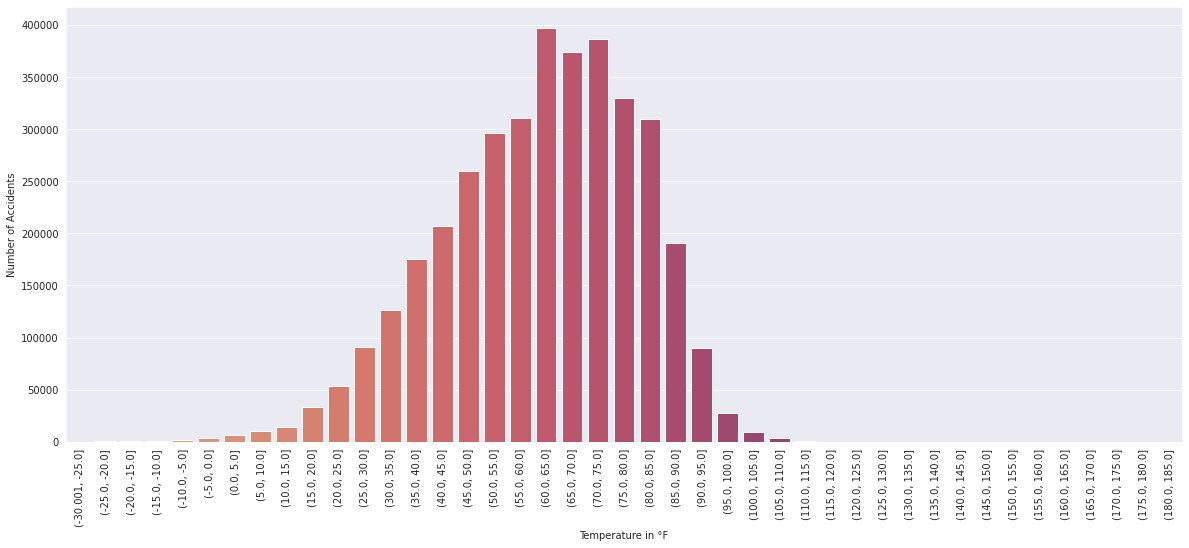

In [120]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=temp_counts_df, x='Temperature', y='No. of Accidents', palette='flare')
ax.set(xlabel='Temperature in °F', ylabel='Number of Accidents')
plt.xticks(rotation = 90)
plt.show()

# Questions and Answers


## 1. Are there more accidents in warmer or colder areas?

*Add Temperature Graph Here*

From the graph above, it seems like the number of accidents isn't greater in warmer or colder areas. Rather, it seems like the number of accidents is lower in these areas, this may be due to the lower population in these areas as most people might not live in extreme conditions.

## 2. Which 5 states have the highest number of accidents?

The top 5 states by the number of accidents are as follows - 

| Rank | State | Total Number of Accidents |
| :-- | :---   | :--: |
| 1. | **California** | 822373 |
| 2. | **Florida** | 339099 |
| 3. | **Texas** | 335865 |
| 4. | **South Carolina** | 184625 |
| 5. | **New York** | 171825 |

These numbers seem to be related to the population of the state as California, Florida, Texas and New York are some of the most populous states in the US.



## 3. Does New York show up in the data? If yes, why is the count lower if it is the most populated city?

New York reported *7512* accidents in the given timeframe. This is in no way the highest number of accidents reported by any city. There could be a number of reasons for New York reported a lower number of accidents than expected. 

One of the reasons may be that because of the traffic in New York, cars usually aren't traveling at a high speed so accidents can be prevented by quick reactions and evasive actions.

Another reasons could be that the dataset does not contain many accidents reports. According to the [2018 statistics](https://www.dandalaw.com/blog/are-car-accidents-common-in-new-york-city/) New York reporteed 19,000 car accidents per month. The dataset only contains a total of 7512 accidents in the timeframe from February 2016 to December 2020.

## 4. Among the top cities in number of accidents, which states do they belong to most frequently?

*Insert Cities Graph Here*

The graph above represents the top 20 cities by number of accidents.

*Insert States Graph Here*

As we can see from the graph above, 10 out of 50 cities that contribute the highest number of accidents belong to California. The other states in the top 3 are Michigan and Florida. These top 50 cities contribute a total of **1,373,632** and this number is approximately equal to **37%** of the entire dataset!

## 5. What time of the day are the accidents more frequent in?

*Insert Graph Here*

From the graph above, we can see that the number of accidents that happen between 6 AM and 9 AM in the morning and 3 PM and 6 PM in evening is very high. These times are often the times when most poeple go to work and leave from work. Hence, we can see that most accidents happen when people are traveling to and from work.

On further calculation, we find out that the total number of accidents happening in the peak hours between 6AM and 9AM in the morning and 3PM and 6PM in the evening is equal to **1,782,351** which amounts to **47.99%** of the entire dataset.

## 6. Which days of the week have the most accidents?

*Insert Graph Here*

From the graph above, we can see that most accidents happen on **weekdays** i.e. from Monday to Friday. This is further proof of the initial observation that a majority of accidents occur when people are traveling to work. Since most people only work on weekdays, the number of accidents on these days is a lot higher than the number of accidents on other days.

## 7. Which months have the most accidents?

*Insert Graph Here*

From the graph above, we can see that the holiday season contributes the highest number of accidents. This is in line with the [National Highway Traffic Safety Administration Report](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812823) which states that there are generally more car crash fatalities during the holidays than non-holidays. For example, in 2017, the average amount of fatalities during major holidays was 119 per day compared to 102 per day at other times of the year. 

Additionally, the report by [texasjustice.com](https://texasjustice.com/blog/why-car-accidents-increase-during-holidays/) also provides reasons for such a drastic increase in the number of accidents. Some of the reasons are:

*   Increased Traffic 
*   Increased Drunk Driving 
*   Stressed, Distracted Driving
*   Visiting Drivers Unfamiliar with Roads 
*   Dangerous Driving Conditions 



## 8. What is the trend of accidents YoY (decreasing/increasing)?

*Insert Graph Here*

From the graph above, we can see that the number of accidents appear to be increasing every year. However, this might be attributed to the way the data has been collected. This can be proven by the fact that the number of fatalities seem to be roughly the same every year as shown in this [Yearly Snapshot](https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot) by the IIHS

# Summary & Conclusions
- The number of accidents per city decreases exponentially.
- Less than 5% of cities have more than 1000 yearly accidents
- Over 1200 cities have reported just 1 accident (need to investigate)